In [117]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

In [118]:
author_marker_dict = {
    "Nietzsche": "o",
    "Kafka": "s",
    "Austen": "^",
    "Hesse": "D"
}
author_color_dict = {
    "Nietzsche": (0.2, 0.4, 0.8),
    "Kafka": (0.1, 0.7, 0.3),
    "Austen": (0.9, 0.6, 0.1),
    "Hesse": (0.9, 0.6, 0.3)
}

numerical_columns = [
    # "node_count",
    # "edge_count",
    "average_degree",
    "median_degree",
    "diameter",
    "average_distance",
    "betweenness_average",
    "average_clustering"
]



In [119]:
df = pd.read_csv("output_combined.csv").iloc[4:, :]
df = df[df["stopwords_removed"] == True]
# df = df[df["language"] == "de"]
print(df)

       author         title language  token_list_length  node_count  \
4   Nietzsche  Menschliches       en              42016        5760   
5       Kafka   Verwandlung       de               8991        2742   
6   Nietzsche       Goetzen       en              14198        3580   
7      Austen      Verstand       de              52313        6720   
8      Austen          Anna       de              34971        5195   
9       Kafka       Amerika       en              42797        4924   
10     Austen     Mansfield       en              69696        5189   
11      Kafka       Schloss       de              46406        6963   
12  Nietzsche   Zarathustra       en              44819        5460   
13     Austen     Mansfield       de              72846        9272   
14      Kafka       Amerika       de              41044        6986   
15  Nietzsche  Menschliches       de              38912        8419   
16      Kafka       Schloss       en              51314        4256   
17    

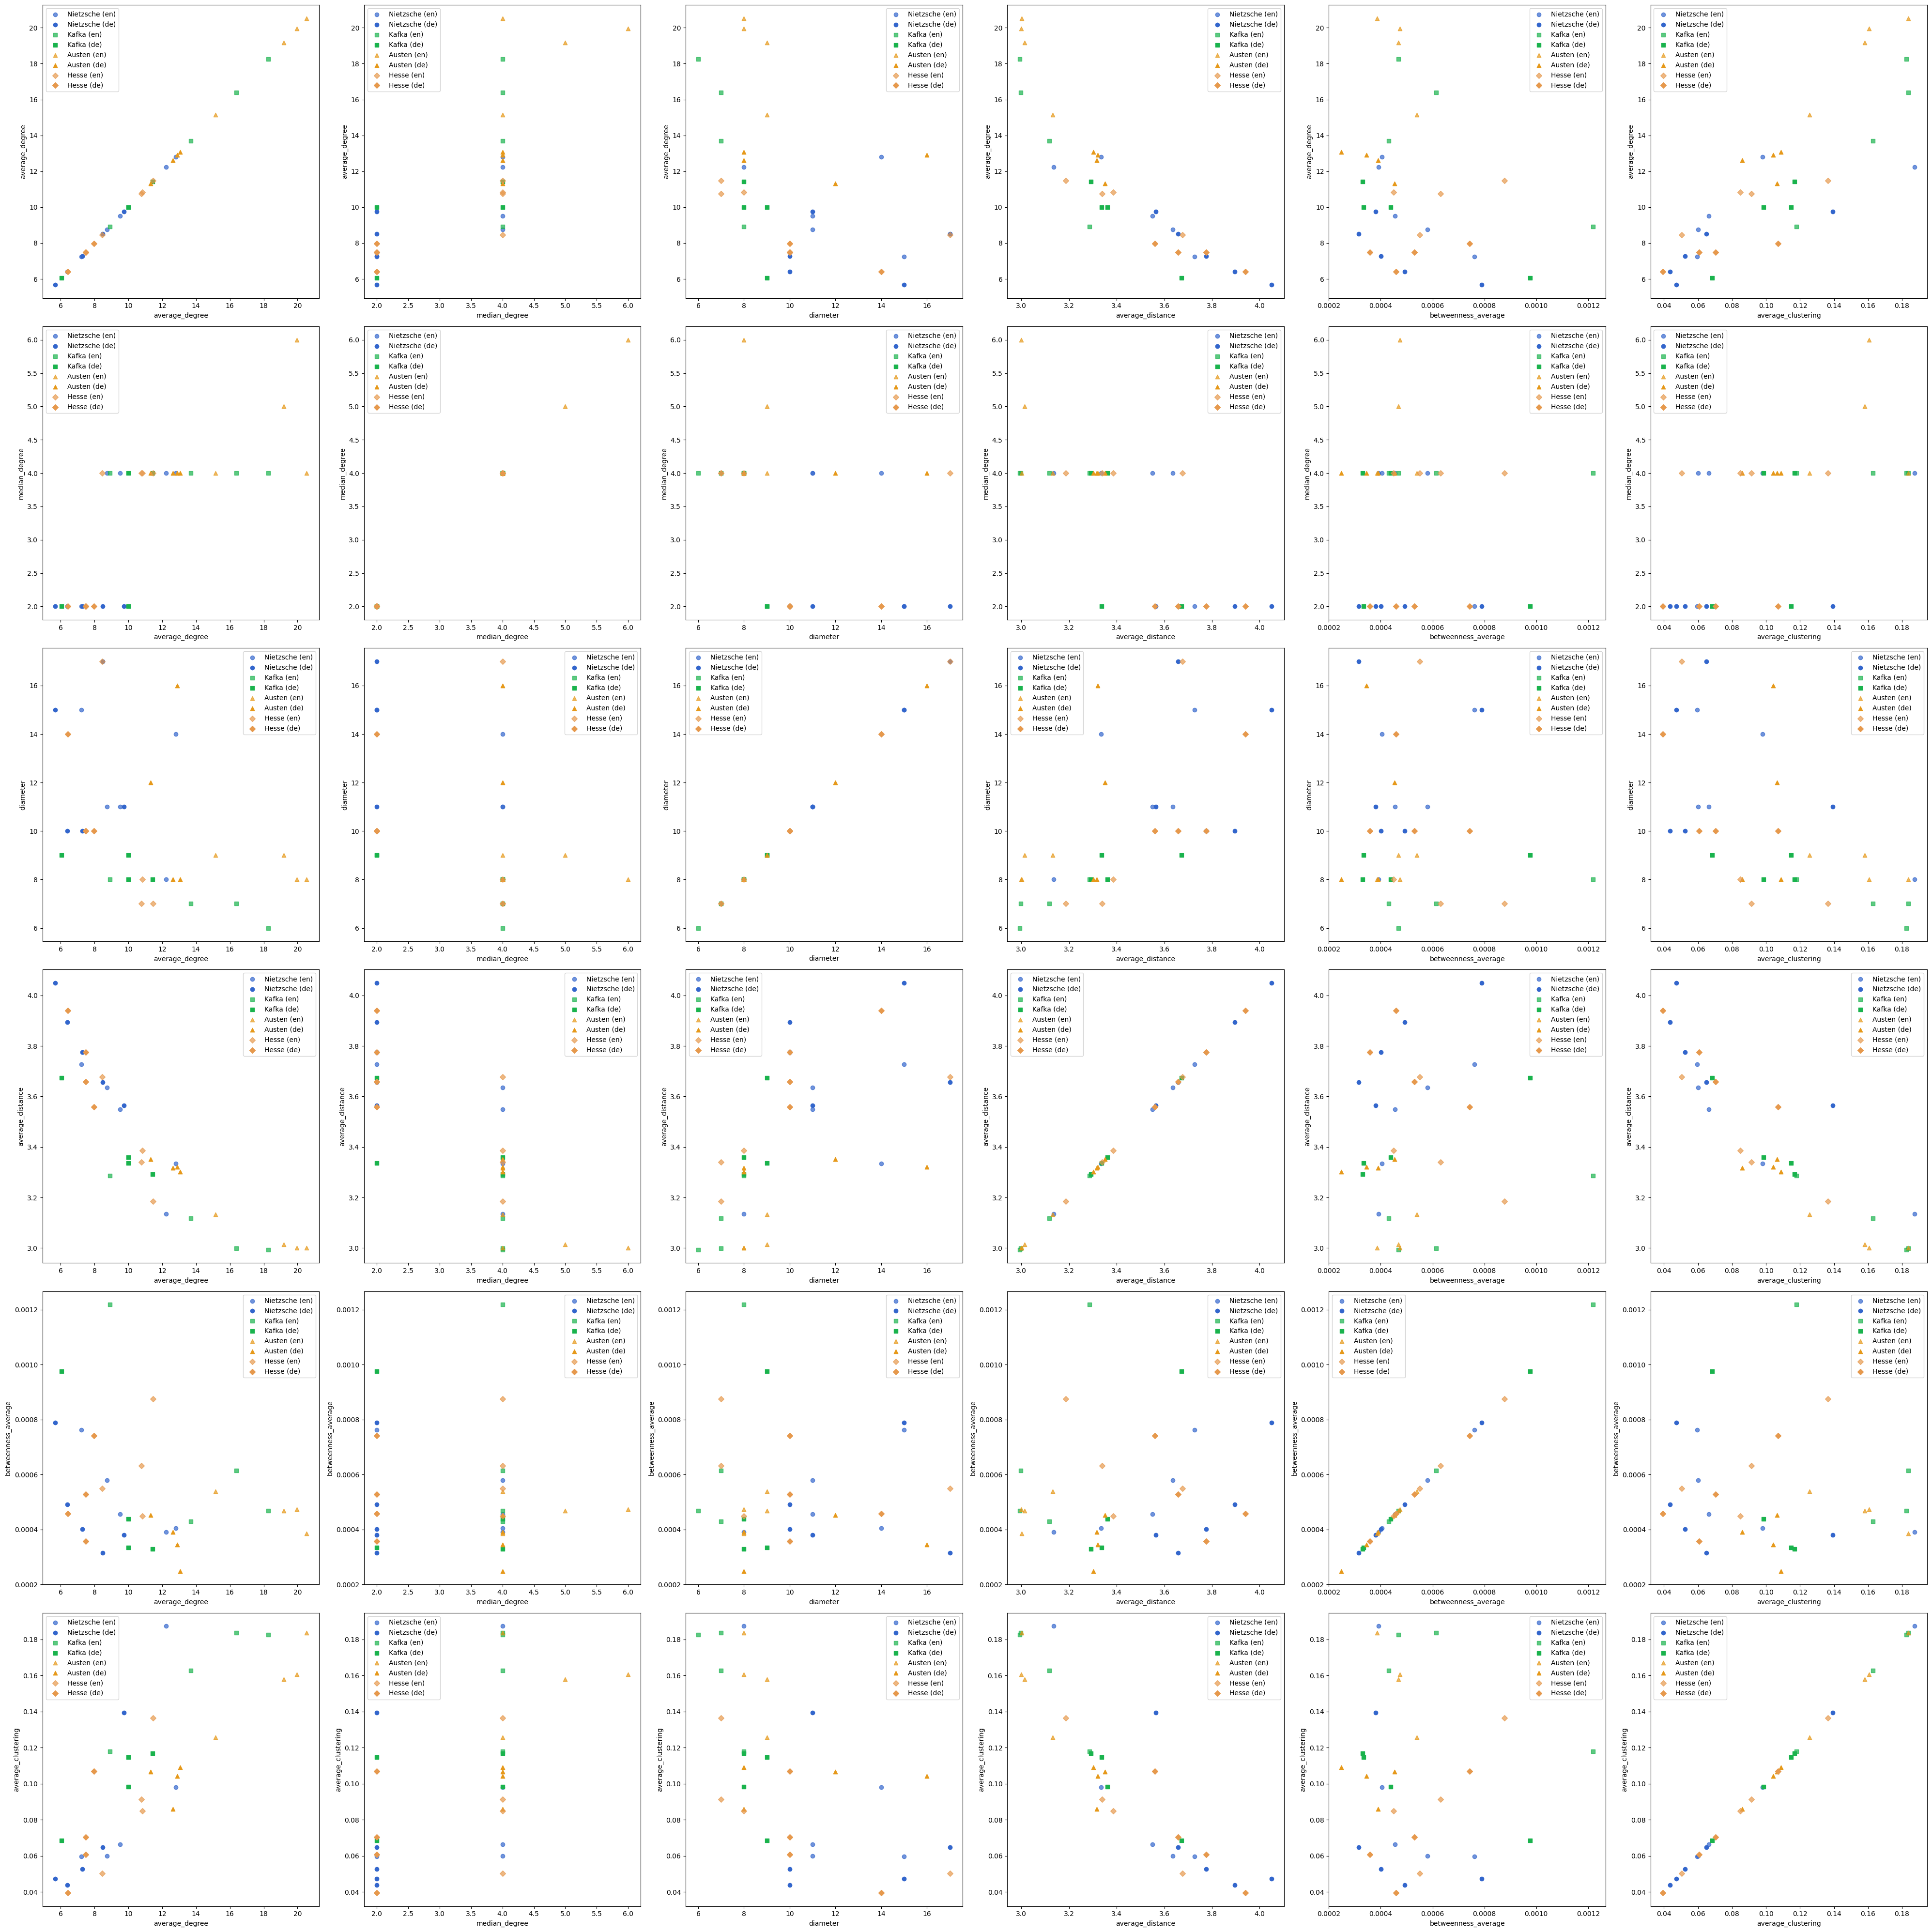

In [120]:
fig, axes = plt.subplots(len(numerical_columns), len(numerical_columns), figsize=(40, 40))


for i, column_i in enumerate(numerical_columns):
    for j, column_j in enumerate(numerical_columns):
        for author in author_marker_dict:
            # Unterschiedliche Farben für Englisch und Deutsch
            author_color = author_color_dict[author]
            author_color_en = author_color + (0.7,)  # heller (englisch)
            author_color_de = author_color + (1.0,)  # dunkler (deutsch)
            ax = axes[i, j]
            ax.set_xlabel(column_j)
            ax.set_ylabel(column_i)

            author_rows_en = df[(df["author"] == author) & (df["language"] == "en")]
            author_rows_de = df[(df["author"] == author) & (df["language"] == "de")]

            ax.scatter(author_rows_en[column_j], author_rows_en[column_i], marker=author_marker_dict[author], label = f"{author} (en)", color = author_color_en)

            ax.scatter(author_rows_de[column_j], author_rows_de[column_i], marker=author_marker_dict[author], label = f"{author} (de)", color = author_color_de)
            # edgecolors="black" kann hinzugefügt werden

            ax.legend()
plt.tight_layout()
plt.savefig("scatter_matrix.png")
plt.show()